In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('/Users/yinchiahuang/Library/Mobile Documents/com~apple~CloudDocs/CS677/Assignments/yinchia@bu.edu_hw1/HMC_Honda Motor Co., Ltd.csv')

In [3]:
def compute_histogram(df,bins=20,win=1):
    try:
        new_df = df.copy()
        new_df.rename(columns={'Adj Close': 'Price'}, inplace = True)
        new_df = new_df[['Date', 'Price']]
        new_df['pct_change'] = new_df['Price'].pct_change(win)
        new_df['pct_change'].fillna(0, inplace = True)
        change_array = new_df['pct_change'].as_matrix()
        hist, bin_edges = np.histogram(a=change_array, bins = bins , density = True)
        weights = np.ones_like(change_array)/float(len(change_array))
        plt.hist(change_array,weights = weights)
        
        return hist,bin_edges

    except Exception as e:
        print(e)
        return None, None


/Users/yinchiahuang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


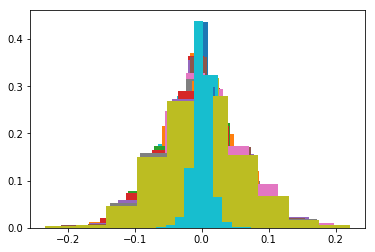

In [4]:
hist_list = []

for win in range(2,31):
    hist, edges = compute_histogram(df, bins=20,win=win)
    hist_list.append(hist)
    
hist_reference, edges = compute_histogram(df, bins=20, win=1)


In [5]:
len(hist_list)

29

### Computation of distances:

#### Euclidean

In [6]:
from scipy.spatial import distance
distance_euclidean = []
for i in range(len(hist_list)):
    dst_euclidean = distance.euclidean(hist_list[i],hist_reference)
    distance_euclidean.append(dst_euclidean)

distance_euclidean

[23.724677348014854,
 22.298851594298274,
 27.44173349492371,
 30.139522115906306,
 32.05297144930537,
 33.980828070733864,
 35.81879118983783,
 36.74831946918829,
 38.44455709476717,
 39.436161822529655,
 40.13825607067231,
 42.619975357475425,
 40.62490045822091,
 41.09597791292773,
 41.64954539120343,
 42.22449551260835,
 42.99028161478312,
 43.50475214328278,
 43.464152548865755,
 43.76167133126635,
 44.509674897882384,
 45.066510640836654,
 45.01928615234783,
 45.128805231735164,
 45.577833998638376,
 45.844938532060034,
 46.2515373541556,
 46.2965268982681,
 46.672001395946225]

### cityblock (“Manhattan”)

In [7]:
distance_manhattan = []
for i in range(len(hist_list)):
    dst_manhattan = distance.cityblock(hist_list[i],hist_reference)
    distance_manhattan.append(dst_manhattan)

                   
distance_manhattan

[56.02722954522973,
 47.99959769955962,
 56.62247586344025,
 61.8810612252632,
 66.61361545427232,
 74.22632814141173,
 74.3098551774905,
 75.93434403876309,
 81.82167658026414,
 85.46497032034706,
 89.40069844991332,
 96.35359963848757,
 91.5156520197274,
 93.34139426194905,
 92.69952883405625,
 93.41027818989228,
 94.95700274446982,
 97.93973167191827,
 93.36226681031168,
 93.94787538314719,
 95.55724450899201,
 96.36471081075051,
 96.17127090753075,
 97.10822256562494,
 98.82428320907623,
 100.7858440941785,
 102.38276726622401,
 101.28940323771732,
 101.80096572120497]

In [8]:
d = {'win': range(2,31),'euclidean_distance': distance_euclidean, 'manhattan_distance': distance_manhattan}
distance_df = pd.DataFrame(data=d)
distance_df

,win,euclidean_distance,manhattan_distance
0,2,23.724677,56.027230
1,3,22.298852,47.999598
2,4,27.441733,56.622476
3,5,30.139522,61.881061
4,6,32.052971,66.613615
5,7,33.980828,74.226328
6,8,35.818791,74.309855
7,9,36.748319,75.934344
8,10,38.444557,81.821677
9,11,39.436162,85.464970


In [9]:
import matplotlib.pyplot as plt
import pandas as pd

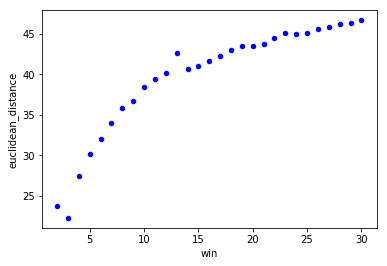

In [15]:
distance_df.plot(kind='scatter', x='win', y='euclidean_distance',color='blue')
plt.show()

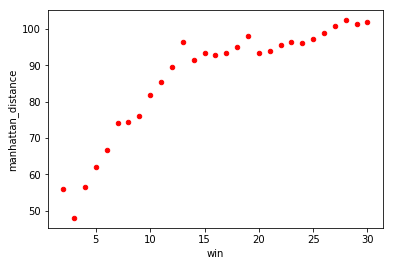

In [14]:
distance_df.plot(kind='scatter', x='win', y='manhattan_distance', color='red')
plt.show()

[Text(0,0.5,'distance'), Text(0.5,0,'win')]

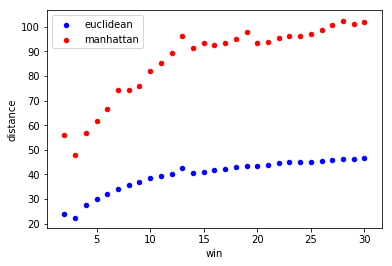

In [13]:
ax = distance_df.plot(kind='scatter', x='win', y='euclidean_distance',color='blue', label='euclidean');
distance_df.plot(kind='scatter', x='win', y='manhattan_distance', color='red', label='manhattan', ax=ax);
ax.set(xlabel="win", ylabel="distance")